In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# ADACS introductory data analysis workshop

This lesson is adapted from the [Data Carpentry Ecology lesson](http://www.datacarpentry.org/python-ecology-lesson/)
- make sure to open this ipython notebook in the same directory as the data used in this notebook

We'll be using an etherpad to share solutions to challenges, ask questions and chat:
- etherpad let's you collaborate simultaniously on the same document
- everyone has their own identificating colour
- there is also a chat function where you can talk and ask questions if you like
Your isntructor will give you the link to the etherpad on the day of the course.
After finishing the course and updated notebook with the answers will be made available in the github repo.

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Recap: quick intro to Python

Python is a high-level, interpreted programming language. This means the code is easy to read for humans and there is no need for us to compile it and in many cases we do not have to think too much about the underlying system fro e.g. memory usage.

As a consequence, we can use it in two ways:
- Using the interpreter as an "advanced calculator" in interactive mode:
- Executing programs/scripts saved as a text file, usually with *.py extension:


## Data types
How information is stored in a DataFrame or a python object affects what we can do with it and the outputs of calculations as well. There are two main types of data that we're explore in this lesson: numeric and character types.


**Numeric Data Types**

- integer
- float

**Character Data Types**

- strings (a word, a sentence, or several sentences)
- strings that contain numbers can not be used for mathematical operations!

**Lists** 

are a common data structure to hold an ordered sequence of
elements. Each element can be accessed by an index.  Note that Python
indexes start with 0 instead of 1:

**Tuple**  

Similar to a list in that it's an ordered sequence of elements. However,
tuples can not be changed once created (they are "immutable"). Tuples are
created by placing comma-separated values inside parentheses `()`.

**Dictionary** 

A container that holds pairs of objects - keys and values.

Dictionaries work a lot like lists - except that you index them with *keys*. 
You can think about a key as a name for or a unique identifier for a set of values
in the dictionary. Keys can only have particular types - they have to be 
"hashable". Strings and numeric types are acceptable, but lists aren't.


## Operators
We can perform mathematical calculations in Python using the basic operators
 `+, -, /, *, %`:
 
** In python 2 if we divide one integer by another, we get an integer! **
The result in python 3 is different where we get a float.
Remember to convert your integers to floats when you want floating point precision for divisions!


We can also use comparison and logic operators:
`<, >, ==, !=, <=, >=` and statements of identity such as
`and, or, not`. The data type returned by this is 
called a _boolean_.
 
## Scripting

 **Comments** start with #
 
 **Methods** are a way to interact with an object (a list, for example). We can invoke 
a method using the dot `.` followed by the method name and a list of arguments in parentheses. 
To find out what methods are available for an object, we can use the built-in `help` command:


A **Library** in Python contains a set of tools (called functions) that perform
tasks on our data. 

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`. 

You only need to load a library once during your session. You can load the library when needed
or you can load all necessary libraries at the beginning of your script. 
This is good practice, especially for the readability of your code

# Working With Pandas DataFrames in Python


One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib](http://matplotlib.org/) and integrates nicely with other libraries
that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.


## Starting in the same spot

To help the lesson run smoothly, let's ensure everyone is in the same directory.
This should help us avoid path and file name issues. At this time please
navigate to the workshop directory. If you working in IPython Notebook be sure
that you start your notebook in the workshop directory.

A quick aside that there are Python libraries like [OS
Library](https://docs.python.org/3/library/os.html) that can work with our
directory structure, however, that is not our focus today.

If you need to change your directory ```import os``` and use ```os.chdir```

Or you can use **%** to access the command line, e.g. ```% cd folder_name```


## Our Data 

For this lesson, we will be using [Galaxy Zoo DR1 data](https://www.google.com/search?q=galaxy+zoo&ie=utf-8&oe=utf-8&client=firefox-b-ab). Galaxy Zoo is described in Lintott et al. 2008, MNRAS, 389, 1179 and the data release is described in Lintott et al. 2011, 410, 166.

The table we use is an adapted version of Table 2, listing classifications of galaxies which have spectra included in SDSS Data Release 7. The debiased fraction of the votes in elliptical and spiral categories is given, along with flags identifying systems as classified as spiral, elliptical or uncertain.


| Column           | Description                             |
|------------------|-----------------------------------------|
| id               | SDSS ID, objects taken from DR7         |
| ra               | Right Ascension  (HMS)                  |
| dec              | Declination (DMS)                       |
| nvote            | number of votes                         |
| p_e              | debiased vote fraction Ellipticals      |
| p_s              | debiased vote fraction all Spirals      |
| type             | whether final vote is E, S or U         |
| class            | spiral or elliptical class, eg E0 or CW |

Galaxies flagged as ‘elliptical’ or ‘spiral’ require 80 per cent of the vote in that category after the debiasing procedure has been applied; all other galaxies are flagged ‘uncertain’.
Note, the elliptical class is randomly assigned. The spiral class is based on the highest vote fraction of the spiral classes in the Galaxy Zoo DR 1 Table 2 data.


In [2]:
#if you need to change your directory
import os
os.getcwd()
os.chdir("data/") #make sure you enter the correct fille path

In [3]:
import pandas as pd
#check your version, we need v0.19 or higher
pd.__version__

'0.20.3'

# Dealing With Data In Pandas

We will begin by locating and reading our survey data which are in CSV format.
We can use Pandas' `read_csv` function to pull the file directly into a
[DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

## So What's a DataFrame?

A DataFrame is a 2-dimensional data structure that can store data of different
types (including characters, integers, floating point values, factors and more)
in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in
R. A DataFrame always has an index (0-based). An index refers to the position of 
an element in the data structure.


In [4]:
# note that pd.read_csv is used because we imported pandas as pd
gal_df=pd.read_csv('GalaxyZoo1.csv')

## Useful Ways to View DataFrame objects in Python


First, let's check the data type of the data stored in `gal_df` using the `type` method. 
The `type` method and `__class__` attribute tell us that `gal_df` is `<class 'pandas.core.frame.DataFrame'>`.

In [5]:
type(gal_df) # or gal_df.__class__

pandas.core.frame.DataFrame

We can also enter `gal_df.dtypes` in our prompt to view the data type for each
column in our DataFrame. `int64` represents numeric integer values - `int64` cells
can not store decimals. `object` represents strings (letters and numbers). `float64`
represents numbers with decimals.

In [6]:
gal_df.dtypes

id       float64
ra        object
dec       object
nvote      int64
p_e      float64
p_s      float64
type      object
class     object
dtype: object

Pandas and base Python use slightly different names for data types. More on this
is in the table below:

| Pandas Type | Native Python Type | Description |
|-------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta[ns] | N/A (but see the [datetime] module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments. |

[datetime]: http://doc.python.org/2/library/datetime.html

There are multiple other methods that can be used to summarize and access the data
stored in DataFrames. Let's try out a few. Note that we call the method by using
the object name `gal_df.method`. So `gal_df.columns` provides an index
of all of the column names in our DataFrame.

### Challenges

Try out the methods below to see what they return.

1. `gal_df.columns`.
2. `gal_df.head()`. Also, what does `gal_df.head(15)` do?
3. `gal_df.tail()`.
4. `gal_df.shape`. Take note of the output of the shape method. What format does it return the shape of the DataFrame in?

HINT: [More on tuples, here](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences).

In [7]:
gal_df.columns

Index(['id', 'ra', 'dec', 'nvote', 'p_e', 'p_s', 'type', 'class'], dtype='object')

In [8]:
gal_df.shape

(667944, 8)

In [9]:
gal_df.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U


We can see that there were 667944 rows and 8 columns parsed.
It looks like  the `read_csv` function in Pandas  read our file properly.

Now we can start manipulating our data. 


## Selecting Data Using Labels (Column Headings)

We use square brackets `[]` to select a subset of an Python object. For example,
we can select all of the data from a column named `type` from the `gal_df`
DataFrame by name:

```python
gal_df['type']
# this syntax, calling the column as an attribute, gives you the same output
gal_df.type
```

We can also create an new object that contains the data within the `type`
column as follows:

```python
# create an object named gal_types that only contains the `types` column
gal_types = gal_df['types']
```

We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.

```python
# select the type and class columns from the DataFrame
gal_df[['type', 'class']]
# what happens when you flip the order?
gal_df[['class', 'type']]
#what happens if you ask for a column that doesn't exist?
gal_df['types']
```

In [10]:
gal_df[['type', 'class']].head()

,type,class
0,U,U
1,S,EDGE
2,U,U
3,E,E1
4,U,U


In [11]:
gal_df[['class', 'type']].head()

,class,type
0,U,U
1,EDGE,S
2,U,U
3,E1,E
4,U,U


In [12]:
gal_df['types']

KeyError: 'types'

## Quick aside: Python and integer division

**In python 2 integer division returns and integer, as opposed to python 3 where we get a float.**
If at least one of the numebrs is a float then we get a float.
Alternatively we could use ```from __future__ import division```, which will then treat integer division in
python 2 as python 3. However, be aware that if the way python handles division is changed in the future your code might break. So choose what you think is the most stable option for your scripts!


To modify the format of values within our data frame we can use the ```astype``` function (also remember in pandas the type is `float64`).
Don't forget this is a function within pandas so we use it with a `.`, for example to convert 
the `nvote` field to floating point values we would run:

In [13]:
# convert the nvote field from an integer to a float
gal_df['nvote']=gal_df['nvote'].astype('float64')

In [14]:
gal_df.dtypes

id       float64
ra        object
dec       object
nvote    float64
p_e      float64
p_s      float64
type      object
class     object
dtype: object

In [15]:
from __future__ import division
10/3

3.3333333333333335

What happens if we try to convert probability values to integers?

In [16]:
gal_df['p_e']=gal_df['p_e'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

Notice that this throws a value error: `ValueError: Cannot convert NA to
integer`. If we look at the `weight` column in the surveys data we notice that
there are NaN (**N**ot **a** **N**umber) values. *NaN* values are undefined
values that cannot be represented mathematically. Pandas, for example, will read
an empty cell in a CSV or Excel sheet as a NaN. NaNs have some desirable
properties: if we were to average the `weight` column without replacing our NaNs,
Python would know to skip over those cells.


_Note: older pandas version do not know how to handle NaN, please update to v0.19_

Check your pandas version using `pd.__version__`, if you need to update open a bash shell
and type ```conda update pandas```.

---

## Missing Data Values - NaN

Dealing with missing data values is always a challenge. It's sometimes hard to
know why values are missing - was it because of a data entry error? Or data that
someone was unable to collect? Should the value be 0? We need to know how
missing values are represented in the dataset in order to make good decisions.
If we're lucky, we have some metadata that will tell us more about how null
values were handled.

For instance, in some disciplines, like Remote Sensing, missing data values are
often defined as -9999. Having a bunch of -9999 values in your data could really
alter numeric calculations. Often in spreadsheets, cells are left empty where no
data are available. Pandas will, by default, replace those missing values with
NaN. However it is good practice to get in the habit of intentionally marking
cells that have no data, with a no data value! That way there are no questions
in the future when you (or someone else) explores your data.

### Where Are the NaN's?

Let's explore the NaN values in our data a bit further. 
First, let's figure out how many rows contain NaN values for weight. 
We can do this by identifying how many rows have a NULL value (`.isnull`) or by counting the number of rows that have a meaningful value (e.g., p_e>0):

In [17]:
gal_df['p_e'].mean()

0.39350000000000007

In [18]:
len(gal_df[pd.isnull(gal_df.p_e)])

100

In [19]:
len(gal_df.p_e) - len(gal_df[gal_df.p_e>=0])

100

We can replace all NaN values with zeroes using the `.fillna()` method (after
making a copy of the data so we don't lose our work).

However, NaN and 0 yield different analysis results. The mean value when NaN
values are replaced with 0 is different from when NaN values are simply thrown
out or ignored.

In [20]:
#replace nan with 0
df1 = gal_df.copy()
df1['p_e']=df1['p_e'].fillna(0)

In [21]:
#check mean, how does it differ from before?
print(gal_df['p_e'].mean())
gal_df['p_e'].mean()

0.3935


0.39350000000000007

We can fill NaN values with any value that we chose. The code below fills all
NaN values with a mean for all probabilityvalues.

```python
 df1['p_e'] = gal_df['p_e'].fillna(gal_df['p_e'].mean())
```

We could also chose to create a subset of our data, only keeping rows that do
not contain NaN values, using `.dropna()` method.

**The point is to make conscious decisions about how to manage missing data.** 
This is where we think about how our data will be used and how these values will
impact the scientific conclusions made from the data.

Python gives us all of the tools that we need to account for these issues. We
just need to be cautious about how the decisions that we make impact scientific
results.

In [22]:
 df1['p_e'] = gal_df['p_e'].fillna(gal_df['p_e'].mean())

# Calculating Statistics From Data In A Pandas DataFrame

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with. We might want
to know how many galaxies of a specific type we have, or what the average number of votes was. 
We can perform summary stats quickly using groups. But first we need to figure out what we want to group by.

Let's begin by exploring our data:

In [23]:
gal_df.columns.values

array(['id', 'ra', 'dec', 'nvote', 'p_e', 'p_s', 'type', 'class'], dtype=object)

Let's get a list of all the galaxy types. The `pd.unique` function tells us all of
the unique values in the `type` column:

In [24]:
pd.unique(gal_df['type'])
# or
pd.unique(gal_df.type)

array(['U', 'S', 'E'], dtype=object)

### Challenge

1. What is the difference between `len(gal_df.nvote)` and `gal_df['nvote'].nunique()`?

In [25]:
len(gal_df.nvote)

667944

In [26]:
gal_df['nvote'].nunique()

89

## Summary Statistics
The Pandas function `describe` will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. Pandas'
`describe` function will only return summary values for columns containing
numeric data.
We can calculate basic statistics for all records in a single column using the
syntax below:

In [27]:
gal_df['nvote'].describe()

count    667944.000000
mean         38.760986
std          13.827837
min           4.000000
25%          28.000000
50%          34.000000
75%          51.000000
max          94.000000
Name: nvote, dtype: float64

We can also extract one specific metric if we wish:

```python
gal_df['nvote'].min()
gal_df['nvote'].max()
gal_df['nvote'].mean()
gal_df['nvote'].std()
gal_df['nvote'].count()
```

## Groups in Pandas and summary stats

But if we want to summarize by one or more variables, for example galaxy type, we can
use Pandas' `.groupby` method. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.

In [28]:
sorted_data = gal_df.groupby('type')
# summary statistics for all numeric columns by type
sorted_data.describe()

id                                                          \
         count          mean           std           min           25%   
type                                                                     
E      62190.0  5.878139e+17  1.784691e+14  5.877230e+17  5.877319e+17   
S     190225.0  5.878146e+17  1.804956e+14  5.877230e+17  5.877322e+17   
U     415529.0  5.878143e+17  1.793616e+14  5.877230e+17  5.877319e+17   

                                                   nvote             ...    \
               50%           75%           max     count       mean  ...     
type                                                                 ...     
E     5.877389e+17  5.877428e+17  5.888489e+17   62190.0  37.930777  ...     
S     5.877390e+17  5.877428e+17  5.888489e+17  190225.0  38.630690  ...     
U     5.877386e+17  5.877428e+17  5.888489e+17  415529.0  38.944887  ...     

        p_e              p_s                                                  \
        75%    max     count      mean       std    min    25%    50%    75%   
type                                                                           
E     0.937  1.000   62182.0  0.057612  0.057186  0.000  0.000  0.048  0.087   
S     0.133  0.913  190180.0  0.862874  0.127439  0.087  0.810  0.895  0.956   
U     0.664  0.967  415482.0  0.373474  0.230954  0.000  0.176  0.338  0.561   

             
        max  
type         
E     0.681  
S     1.000  
U     0.973  

[3 rows x 32 columns]

In [29]:
# provide the mean for each numeric column by type
sorted_data.mean()

,id,nvote,p_e,p_s
type,,,,
E,5.878139e+17,37.930777,0.889343,0.057612
S,5.878146e+17,38.630690,0.101943,0.862874
U,5.878143e+17,38.944887,0.452766,0.373474


The `groupby` command is powerful in that it allows us to quickly generate
summary stats.


Let's next count the number of galaxies for each type. We can do this in a few
ways, but we'll use `groupby` combined with a `count()` method.


```python
# count the number of samples by type
type_counts = gal_df.groupby('type')['id'].count()
```

Or, we can also count just the rows that have type='U':

```python
gal_df.groupby('type')['id'].count()['U']
```


### Challenges

1. What happens when you group by two columns using the following syntax and
    then grab mean values:
	- `sorted_data2 = gal_df.groupby(['type','p_e'])`
	- `sorted_data2.mean()`
2. Summarize number of votes for each galaxy class in your data. HINT: you can use the
   following syntax to only create summary statistics for one column in your data
   `by_class['nvote'].describe()`

In [30]:
type_counts = gal_df.groupby('type')['id'].count()
print(type_counts)
gal_df.groupby('type')['id'].count()['U']

type
E     62190
S    190225
U    415529
Name: id, dtype: int64


415529

In [31]:
sorted_data2 = gal_df.groupby(['type','p_e'])
sorted_data2.mean()

id      nvote       p_s
type p_e                                     
E    0.319  5.877417e+17  29.000000  0.681000
     0.324  5.880134e+17  56.000000  0.584000
     0.325  5.877308e+17  37.000000  0.604000
     0.328  5.877368e+17  18.000000  0.672000
     0.359  5.877343e+17  30.000000  0.479000
     0.374  5.877368e+17  60.000000  0.537000
     0.376  5.877319e+17  55.000000  0.486000
     0.404  5.877326e+17  64.000000  0.410000
     0.407  5.877389e+17  62.000000  0.560000
     0.419  5.880180e+17  26.000000  0.581000
     0.423  5.877398e+17  29.000000  0.408000
     0.427  5.877272e+17  19.000000  0.438000
     0.428  5.877260e+17  52.000000  0.354000
     0.430  5.877426e+17  32.000000  0.494000
     0.431  5.877400e+17  21.000000  0.353000
     0.432  5.877415e+17  34.000000  0.434000
     0.439  5.880109e+17  27.000000  0.399000
     0.445  5.877417e+17  40.000000  0.555000
     0.448  5.877320e+17  27.000000  0.478000
     0.451  5.877368e+17  30.000000  0.459000
     0.455  5.877397e+17  36.000000  0.305000
     0.457  5.877390e+17  39.000000  0.543000
     0.459  5.877294e+17  29.000000  0.541000
     0.461  5.880134e+17  66.000000  0.388000
     0.464  5.878719e+17  45.000000  0.486000
     0.466  5.877332e+17  40.000000  0.371000
     0.475  5.877290e+17  27.000000  0.456000
     0.478  5.878742e+17  33.000000  0.439000
     0.480  5.877369e+17  48.000000  0.401000
     0.481  5.880134e+17  34.000000  0.463000
...                  ...        ...       ...
U    0.932  5.878754e+17  36.500000  0.061167
     0.933  5.878496e+17  38.470588  0.056647
     0.934  5.878383e+17  32.742857  0.063000
     0.935  5.877763e+17  39.150000  0.059750
     0.936  5.877735e+17  35.954545  0.061364
     0.937  5.878983e+17  36.250000  0.057833
     0.938  5.879009e+17  34.882353  0.055294
     0.939  5.878020e+17  39.846154  0.054692
     0.940  5.877605e+17  38.090909  0.056909
     0.941  5.877699e+17  32.750000  0.056467
     0.942  5.878296e+17  41.933333  0.054267
     0.943  5.878586e+17  36.687500  0.055188
     0.944  5.877635e+17  35.000000  0.053800
     0.945  5.877621e+17  36.272727  0.051727
     0.946  5.879504e+17  43.000000  0.045667
     0.947  5.878097e+17  30.733333  0.051867
     0.948  5.878508e+17  50.600000  0.048800
     0.949  5.877716e+17  35.133333  0.049733
     0.950  5.877920e+17  40.400000  0.050000
     0.951  5.877675e+17  39.777778  0.045444
     0.952  5.877339e+17  36.444444  0.046111
     0.953  5.878291e+17  43.333333  0.041500
     0.954  5.878067e+17  31.000000  0.046000
     0.955  5.877372e+17  36.000000  0.045000
     0.956  5.878035e+17  30.750000  0.044000
     0.959  5.877300e+17  46.500000  0.041000
     0.960  5.877352e+17  54.000000  0.040000
     0.961  5.877334e+17  47.000000  0.039000
     0.963  5.877437e+17  55.500000  0.037000
     0.967  5.877365e+17  54.000000  0.033000

[2305 rows x 3 columns]

In [32]:
by_class = gal_df.groupby('class')
by_class['nvote'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
ACW,41008.0,38.553941,13.752884,11.0,28.0,33.0,50.0,87.0
CW,38489.0,38.580374,13.808416,10.0,28.0,33.0,50.0,87.0
E0,7769.0,38.084052,13.725845,12.0,28.0,33.0,49.0,84.0
E1,7718.0,38.046644,13.589567,14.0,28.0,33.0,49.0,86.0
E2,7872.0,37.954014,13.799807,12.0,28.0,33.0,49.0,88.0
E3,7875.0,37.947175,13.618929,10.0,28.0,33.0,49.0,81.0
E4,7879.0,37.833735,13.625463,12.0,28.0,33.0,48.0,83.0
E5,7663.0,38.062117,13.908426,4.0,28.0,33.0,50.0,85.0
E6,7683.0,37.734088,13.514799,11.0,28.0,33.0,48.5,94.0



## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all votes by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.

In [33]:
print(gal_df.nvote.head())
# multiply all votes by 2
gal_df['nvote']*=2

0    59.0
1    18.0
2    68.0
3    52.0
4    59.0
Name: nvote, dtype: float64


In [34]:
gal_df.nvote.head()

0    118.0
1     36.0
2    136.0
3    104.0
4    118.0
Name: nvote, dtype: float64

## Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too. Check the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for more details.

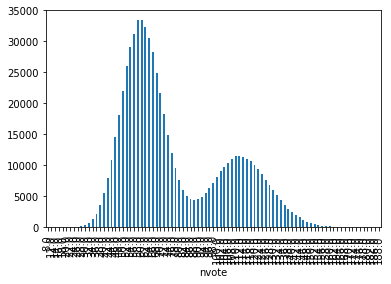

In [35]:
# make sure figures appear inline in Jupyter Notebook
%matplotlib inline
# create a quick bar chart of the number of votes
votes = gal_df.groupby('nvote')['id'].count()
votes.plot(kind='bar')

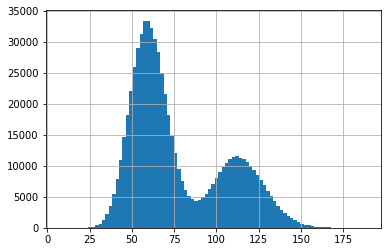

In [36]:
gal_df.nvote.hist(bins=len(votes))

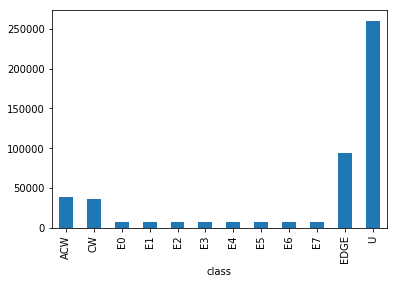

In [37]:
#We can also look at how many galaxies were assigned to each class:
total_count = gal_df['id'].groupby(gal_df['class']).nunique()
# let's plot that too
total_count.plot(kind='bar')

### Challenges

1. Create a plot of average votes across all class of galaxies.
2. Create a plot of total votes for each type of galaxy for the entire dataset.

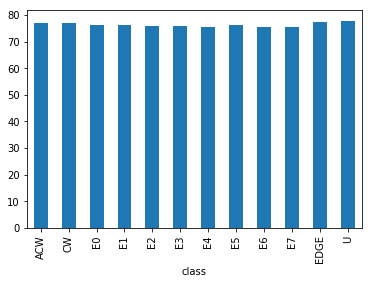

In [38]:
gal_df['nvote'].groupby(gal_df['class']).mean().plot(kind='bar')

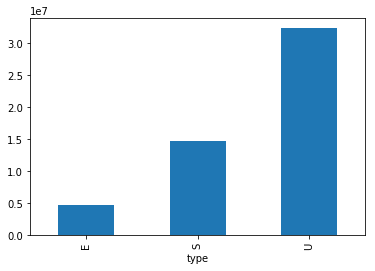

In [39]:
gal_df['nvote'].groupby(gal_df['type']).sum().plot(kind='bar')

# Indexing & Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (ie, column headings - as used previously),
numeric ranges or specific x,y index locations.


**REMINDER**: Python Uses 0-based Indexing


[indexing diagram](https://github.com/datacarpentry/python-ecology-lesson/blob/gh-pages/fig/slicing-indexing.svg)

[slicing diagram](https://github.com/datacarpentry/python-ecology-lesson/tree/gh-pages/fig/slicing-slicing.svg)


## Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this:

```python
# select rows 0,1,2 (but not 3)
gal_df[0:3]
```

The stop bound in Python is different from what you might be used to in
languages like Matlab and R.

```python
# select the first, second and third rows from the surveys variable
gal_df[0:3]
# select the first 5 rows (rows 0,1,2,3,4)
gal_df[:5]
# select the last element in the list
gal_df[-1:]
```

In [40]:
gal_df[0:5:2]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,118.0,0.610,0.186,U,U
2,5.877272e+17,00:00:01.03,-10:56:48.0,136.0,0.432,0.428,U,U
4,5.877312e+17,00:00:01.55,-00:05:33.3,118.0,0.640,0.290,U,U


We can also reassign values within subsets of our DataFrame. But before we do that, let's make a 
copy of our DataFrame so as not to modify our original imported data. 

```python
# copy the surveys dataframe so we don't modify the original DataFrame
gal_copy = gal_df

# set the first three rows of data in the DataFrame to 0
gal_copy[0:3] = 0
```

Next, try the following code: 

```python
gal_copy.head()
gal_df.head()
```
What is the difference between the two data frames?

In [41]:
gal_copy = gal_df
gal_copy[0:3] = 0

In [42]:
gal_copy.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,0.000000e+00,0,0,0.0,0.000,0.000,0,0
1,0.000000e+00,0,0,0.0,0.000,0.000,0,0
2,0.000000e+00,0,0,0.0,0.000,0.000,0,0
3,5.877308e+17,00:00:01.38,+15:30:35.3,104.0,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,118.0,0.640,0.290,U,U


In [43]:
gal_df.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,0.000000e+00,0,0,0.0,0.000,0.000,0,0
1,0.000000e+00,0,0,0.0,0.000,0.000,0,0
2,0.000000e+00,0,0,0.0,0.000,0.000,0,0
3,5.877308e+17,00:00:01.38,+15:30:35.3,104.0,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,118.0,0.640,0.290,U,U


## Referencing Objects vs Copying Objects in Python

We might have thought that we were creating a fresh copy of the `gal_df` objects when we 
used the code `surveys_copy = gal_df`. However the statement  y = x doesn’t create a copy of our DataFrame. 
It creates a new variable y that refers to the **same** object x refers to. This means that there is only one object 
(the DataFrame), and both x and y refer to it. So when we assign the first 3 columns the value of 0 using the 
`surveys_copy` DataFrame, the `gal_df` DataFrame is modified too. To create a fresh copy of the `gal_df`
DataFrame we use the syntax y=x.copy(). But before we have to read the gal_df again because the current version contains the unintentional changes made to the first 3 columns.

```python
gal_df = pd.read_csv("GalaxyZoo1.csv")
gal_copy= gal_df.copy()

```

In [44]:
#read data back in and check it's correct
gal_df = pd.read_csv("GalaxyZoo1.csv")
gal_df.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U


In [45]:
#copy data frame and check the copy
gal_copy= gal_df.copy()
gal_copy.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U


In [46]:
#modify copy and check both copy and original to see changes
gal_copy[0:3] = 0
print(gal_copy.head())
print(gal_df.head())

             id           ra          dec  nvote    p_e    p_s type class
0  0.000000e+00            0            0      0  0.000  0.000    0     0
1  0.000000e+00            0            0      0  0.000  0.000    0     0
2  0.000000e+00            0            0      0  0.000  0.000    0     0
3  5.877308e+17  00:00:01.38  +15:30:35.3     52  0.885  0.077    E    E1
4  5.877312e+17  00:00:01.55  -00:05:33.3     59  0.640  0.290    U     U
             id           ra          dec  nvote    p_e    p_s type class
0  5.877272e+17  00:00:00.41  -10:22:25.7     59  0.610  0.186    U     U
1  5.877272e+17  00:00:00.74  -09:13:20.2     18  0.203  0.797    S  EDGE
2  5.877272e+17  00:00:01.03  -10:56:48.0     68  0.432  0.428    U     U
3  5.877308e+17  00:00:01.38  +15:30:35.3     52  0.885  0.077    E    E1
4  5.877312e+17  00:00:01.55  -00:05:33.3     59  0.640  0.290    U     U


## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc`: indexing via *labels* (which can be numbers)
- `iloc`: indexing via *integers*

To select an index subset of rows AND columns from our DataFrame, we can use the `iloc`
method. For example, we can select RA, Dec and number of votes (columns 2, 3 and 4 if we
start counting at 1), like this:

```python
gal_df.iloc[0:3, 1:4]
```

In [47]:
gal_df.iloc[0:3, 1:4]

,ra,dec,nvote
0,00:00:00.41,-10:22:25.7,59
1,00:00:00.74,-09:13:20.2,18
2,00:00:01.03,-10:56:48.0,68


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.


Next let's explore some other ways to index and select subsets of data using `loc`:

In [48]:
# what does this do?
gal_df.loc[0, ['id', 'p_e', 'p_s']]

id     5.87727e+17
p_e           0.61
p_s          0.186
Name: 0, dtype: object

In [49]:
# What happens when you type the code below? Try using iloc instead of loc
gal_df.loc[[0, 10, 668946], :]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59.0,0.610,0.186,U,U
10,5.877308e+17,00:00:02.58,+15:02:28.3,24.0,0.147,0.701,U,U
668946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
gal_df.iloc[[0, 10, 668946], :]

IndexError: positional indexers are out-of-bounds

NOTE: If using `iloc` labels must be found in the DataFrame or you will get a `KeyError`. Using `loc` (at least in newer versions of Pandas) you'll get NaN entries returned so be careful!

The start bound and the stop bound are **included**.  When using `loc`, integers
*can* also be used, but they refer to the **index label** and not the position. Thus
when you use `loc`, and select 1:4, you will get a different result than using
`iloc` to select rows 1:4.

We can also select a specific data value according to the specific row and
column location within the data frame using the `iloc` function:
`dat.iloc[row,column]`.


```python
gal_df.iloc[2,6]
```

Remember that Python indexing begins at 0. So, the index location [2, 6] selects
the element that is 3 rows down and 7 columns over in the DataFrame.

## Challenges

1. What happens when you type:
	- `gal_df[0:4]`
	- `gal_df[:5]`
	- `gal_df[-1:]`

2. What happens when you call:
    - `gal_df.iloc[0:4, 1:4]`
    - `gal_df.loc[0:4, ['ra','dec','nvote']]`
    - How are the two commands different?

In [51]:
gal_df[0:4]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1


In [52]:
gal_df[:5]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U


In [53]:
gal_df[-1:]

,id,ra,dec,nvote,p_e,p_s,type,class
667943,5.877272e+17,23:59:59.37,-11:11:31.5,54,0.153,0.722,S,EDGE


In [55]:
gal_df.iloc[0:4, 1:4]

,ra,dec,nvote
0,00:00:00.41,-10:22:25.7,59
1,00:00:00.74,-09:13:20.2,18
2,00:00:01.03,-10:56:48.0,68
3,00:00:01.38,+15:30:35.3,52


In [57]:
gal_df.loc[0:4, ['ra','dec','nvote']]

,ra,dec,nvote
0,00:00:00.41,-10:22:25.7,59
1,00:00:00.74,-09:13:20.2,18
2,00:00:01.03,-10:56:48.0,68
3,00:00:01.38,+15:30:35.3,52
4,00:00:01.55,-00:05:33.3,59


## Subsetting Data Using Criteria & Making Masks

A mask can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in python.

Boolean values include `true` or `false`. So for example

```python
# set x to 5
x = 5
# what does the code below return?
x > 5
# how about this?
x == 5
```
When we ask python what the value of `x > 5` is, we get `False`. This is because x
is not greater than 5 it is equal to 5. To create a boolean mask, you first create the
True / False criteria (e.g. values > 5 = True). Python will then assess each
value in the object to determine whether the value meets the criteria (True) or
not (False). Python creates an output object that is the same shape as
the original object, but with a True or False value for each index location.

You can use the syntax below when querying data from a DataFrame. Experiment
with selecting various subsets of our data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`

Let's try this out. 
We can select all rows that have 80 votes.

In [58]:
gal_df[gal_df.nvote == 80]

,id,ra,dec,nvote,p_e,p_s,type,class
2971,5.880155e+17,00:18:19.06,-00:42:44.7,80,0.284,0.172,U,U
10421,5.877315e+17,01:05:54.02,-01:01:53.1,80,0.387,0.538,U,U
13230,5.877272e+17,01:21:36.63,-10:48:43.7,80,0.420,0.286,U,U
17270,5.877242e+17,01:48:33.38,+14:22:10.2,80,0.431,0.455,U,U
22659,5.877242e+17,02:34:48.44,-07:41:00.9,80,0.000,1.000,S,ACW
24235,5.877315e+17,02:55:50.11,-00:08:55.7,80,0.787,0.098,E,E4
24515,5.877315e+17,02:59:58.17,+00:44:55.9,80,0.849,0.076,E,E1
30570,5.877381e+17,07:27:52.09,+44:21:31.4,80,0.592,0.165,U,U
36460,5.877289e+17,07:46:39.57,+32:33:09.7,80,0.135,0.316,U,U
44918,5.877322e+17,07:58:50.08,+25:44:46.5,80,0.018,0.944,S,ACW


In [59]:
#Or we can select all rows that do not contain 80 votes.
gal_df[gal_df.nvote != 80]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U
5,5.877272e+17,00:00:01.57,-09:29:40.3,28,0.830,0.060,U,U
6,5.877312e+17,00:00:01.86,+00:43:09.3,38,0.351,0.473,U,U
7,5.877272e+17,00:00:02.00,+15:41:49.8,26,0.143,0.857,S,EDGE
8,5.877308e+17,00:00:02.10,+15:52:54.2,62,0.355,0.548,U,U
9,5.877272e+17,00:00:02.41,+14:49:19.0,31,0.109,0.789,S,EDGE


In [60]:
#We can define sets of criteria too:
gal_df[(gal_df.nvote >= 80) & (gal_df.nvote <= 100)]

,id,ra,dec,nvote,p_e,p_s,type,class
2971,5.880155e+17,00:18:19.06,-00:42:44.7,80,0.284,0.172,U,U
4915,5.877272e+17,00:31:40.57,-09:27:08.5,82,0.255,0.624,U,U
5093,5.877272e+17,00:33:00.64,-09:27:33.2,84,0.399,0.464,U,U
7875,5.877242e+17,00:51:41.19,+15:54:04.9,82,0.292,0.606,U,U
10421,5.877315e+17,01:05:54.02,-01:01:53.1,80,0.387,0.538,U,U
10619,5.877242e+17,01:07:01.70,+13:57:29.2,82,0.423,0.531,U,U
12601,5.877315e+17,01:18:19.56,+01:04:53.7,85,0.915,0.025,U,U
12845,5.880155e+17,01:19:23.51,-01:10:07.2,88,0.712,0.178,U,U
13230,5.877272e+17,01:21:36.63,-10:48:43.7,80,0.420,0.286,U,U
17270,5.877242e+17,01:48:33.38,+14:22:10.2,80,0.431,0.455,U,U


Next, let's identify all locations in the survey data that have
null (missing or NaN) data values. We can use the `isnull` method to do this.
Each cell with a null value will be assigned a value of  `True` in the new
boolean object.

In [61]:
pd.isnull(gal_df)

,id,ra,dec,nvote,p_e,p_s,type,class
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


To select the rows where there are null values,  we can use 
the mask as an index to subset our data as follows:

```python
#To select just the rows with NaN values, we can use the .any method
gal_df[pd.isnull(gal_df).any(axis=1)]
```

We can run isnull on a particular column too. What does the code below do?

```python
# what does this do?
empty_pE = gal_df[pd.isnull(gal_df['p_e'])
```

Let's take a minute to look at the statement above. 

We are using the Boolean object as an index. 
We are asking python to select rows that have a `NaN` value for the probability of a galaxy being Elliptical.

In [62]:
empty_pE = gal_df[pd.isnull(gal_df['p_e'])]
empty_pE.describe()

,id,nvote,p_e,p_s
count,1.000000e+02,100.00000,0.0,100.000000
mean,5.877965e+17,38.42000,NaN,0.463080
std,1.573869e+14,12.71695,NaN,0.354045
min,5.877242e+17,22.00000,NaN,0.000000
25%,5.877311e+17,29.00000,NaN,0.115750
50%,5.877366e+17,33.00000,NaN,0.383500
75%,5.877421e+17,50.00000,NaN,0.818250
max,5.888489e+17,64.00000,NaN,1.000000


### Challenges

1. You can use the `isin` command in python to query a DataFrame based upon a list of values as follows:
   `gal_df[gal_df['class'].isin([listGoesHere])]`. Use the `isin` function to find all Elliptical galaxies of class E0, E1 and E7. How many records contain these values?
2. The `~` symbol in Python can be used to return the OPPOSITE of the selection that you specify in python. It is equivalent to **is not in**. Write a query that selects all Spiral galaxies that are not classed as 'OTHER' an 'EDGE'.
3. Create a new DataFrame that only contains valid (i.e. no NAN probability) observations of Spiral galaxies with over 100 votes.

In [63]:
# challenge 1 -> count of E0,E1,E7
gal_df[gal_df['class'].isin(["E0","E1","E7"])].count()

id       23218
ra       23218
dec      23218
nvote    23218
p_e      23212
p_s      23217
type     23218
class    23218
dtype: int64

In [64]:
#challenge 2 -> all spirals that are not OTHER or EDGE
gal_df[(~gal_df['class'].isin(["OTHER","EDGE"])) & (gal_df['type']=="S")]

,id,ra,dec,nvote,p_e,p_s,type,class
36,5.877308e+17,00:00:09.02,+15:26:14.4,31,0.473,0.527,S,ACW
45,5.877312e+17,00:00:12.79,+01:07:12.7,28,0.036,0.929,S,CW
48,5.877308e+17,00:00:13.19,+14:35:30.1,33,0.186,0.725,S,ACW
49,5.880155e+17,00:00:13.44,-01:12:49.0,25,0.061,0.898,S,CW
72,5.877312e+17,00:00:20.94,+00:12:54.3,29,0.041,0.959,S,ACW
80,5.877308e+17,00:00:27.47,+14:57:44.9,33,0.061,0.939,S,CW
84,5.877272e+17,00:00:28.20,+14:25:09.8,65,0.066,0.872,S,CW
99,5.877272e+17,00:00:35.38,+15:13:54.4,59,0.031,0.969,S,ACW
105,5.877308e+17,00:00:38.69,+14:35:48.2,19,0.000,1.000,S,CW
128,5.877272e+17,00:00:44.79,-10:24:20.9,35,0.000,1.000,S,CW


In [65]:
#challenge 3 -> spiral probaility is column 'p_s'
high_count_spirals = gal_df[(~gal_df['p_s'].isnull()) & 
                            (gal_df['nvote']>60)]

In [66]:
high_count_spirals.describe()

,id,nvote,p_e,p_s
count,6.476700e+04,64767.000000,64759.000000,64767.000000
mean,5.878144e+17,65.505365,0.391320,0.488154
std,1.808400e+14,4.103345,0.301808,0.322232
min,5.877230e+17,61.000000,0.000000,0.000000
25%,5.877320e+17,62.000000,0.100000,0.181000
50%,5.877386e+17,64.000000,0.346000,0.464000
75%,5.877428e+17,68.000000,0.665000,0.799000
max,5.888489e+17,94.000000,1.000000,1.000000


# Prepping our data for machine learning

## Problem definition

We have been tasked to develop a machine learning model to classify galaxies by their morphology (appearance) from a dataset containing measurements such as:

- redshift
- magnitude in _ugriz_ bands
- exponential scale radius and ellipticity
- de Vaucouleurs scale radius and ellipticity
- stellar mass
- ...
- etc.

Galaxies in the dataset have labels taken from [Galaxy Zoo](https://www.galaxyzoo.org/) DR1 - Table 2. Galaxy Zoo is described in Lintott et al. 2008, MNRAS, 389, 1179 and the data release is described in Lintott et al. 2011, 410, 166. 

We use the final debiased labels to categorise a galaxy as:

- spiral
- elliptical

![Galaxies](http://4.bp.blogspot.com/_rfhv4lPQhSY/TUQjfMLtrxI/AAAAAAAABAo/W3OF0mXZNZc/s1600/spiral%2Bor%2Belliptical%2Bzoo%2B1.jpg)

<div style="text-align:center;font-weight:bold">Figure: A spiral galaxy (left) and elliptical galaxy (right)</div>

Our goal is to train a model that can accurately classify galaxies. We want our model to generalise well. i.e. it can correctly classify unseen galaxies (i.e. galaxies not in our training dataset).

#### Dataset

For our introduction to machine learning, we will be using a subset of the data we worked with so far. To be able to try several machine learning algorithms we will be using a data set that combines [Galaxy Zoo DR1](https://www.galaxyzoo.org/) and the Sloan Digital Sky Survey (SDSS) ([using the DR9 SQL search](http://skyserver.sdss.org/dr9/en/tools/search/sql.asp)). 

The data dictionary for this dataset is presented in Table 1. This dataset is limited to the first 5,000 Galaxy Zoo classified galaxies which have spectra in the SDSS database. The debiased fraction of the votes in elliptical and spiral categories is given, along with columns identifying systems classified as spiral, elliptical or uncertain.

<p style="text-align:center;font-weight:bold">Table 1: Data dictionary</p>

| Column           | Description                                                            |
|:-----------------|:-----------------------------------------------------------------------|
| id               | unique SDSS ID composed of [skyVersion, rerun, run, camcol, field, obj]|
| ra               | right ascension  (HMS)                                                 |
| dec              | declination (DMS)                                                      |
| redshift         | redshift                                                               |
| mag_u            | magnitude _u_ band                                                     |
| mag_g            | magnitude _g_ band                                                     |
| mag_r            | magnitude _r_ band                                                     |
| mag_i            | magnitude _i_ band                                                     |
| mag_z            | magnitude _z_ band                                                     |
| deVRad_r         | de Vaucouleurs scale radius fit in _r_ band                            |
| deVAB_r          | ellipticity from de Vaucouleurs fit in _r_ band                        |
| expRad_r         | exponential scale radius fit in _r_ band                               |
| expAB_r          | ellipticity from exponential fit in _r_ band                           |
| stellar_mass     | log galaxy mass (in units of solar mass)                               |
| votes            | number of Galaxy Zoo annotators                                        |
| p_el_debiased    | debiased labelling probability the galaxy is elliptical                |
| p_cs_debiased    | debiased labelling probability the galaxy is spiral                    |
| spiral           | label = spiral galaxy {0=False, 1=True}                                |
| elliptical       | label = elliptical galaxy {0=False, 1=True}                            |
| uncertain        | label = uncertain {0=False, 1=True}                                    |


#### Understand and clean the data

The next step is to explore and familiarise ourselves with the data using the methods we learnedabove. 
Datasets can have errors, and it's important to identify and resolve these errors before rushing in to develop our ML models. Errors in the dataset that aren't resolved will propogate through the machine learning pipeline and will bias our results.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to clean or remove some of the data?

Let's start by reading the data into a `pandas` DataFrame and inspecting the first few rows.

In [67]:
# Import pandas
import pandas as pd
import os
os.getcwd()

'/Users/268964i/Documents/REPOSITORIES/ADACS-obs-workshop/DAY2/pandas/data'

In [68]:
# Read the data file, make sure you are trying to access the correct folder/file
data = pd.read_csv('galaxies.csv')

# Display the first few rows using the .head() method
data.head()

,id,ra,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,votes,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
0,588848899361341000,146.94999,-0.592202,0.064777,0.000000,0.000000,0.000000,0.000000,0.000000,3.768534,0.349999,2.060232,0.406615,9.767632,56,0.164,0.745,1,0,0
1,587725074995609000,147.32951,0.028903,0.048096,17.595560,16.019156,15.319424,14.944425,14.666128,6.055902,0.613006,3.575483,0.519457,10.642694,25,0.000,1.000,1,0,0
2,587725073921409000,146.31179,-0.813209,0.205911,20.913139,19.012896,17.684309,17.187099,16.866304,1.166274,0.745415,0.830849,0.821845,11.265907,24,0.739,0.052,0,0,1
3,588848899361210000,146.74174,-0.524692,0.131516,19.389297,18.201830,17.492212,17.073881,16.899815,5.368439,0.644690,2.511333,0.695197,10.575160,39,0.312,0.624,0,0,1
4,588848899898015000,146.46892,-0.092844,0.062509,17.436966,15.313985,14.333739,13.920478,13.618734,10.595940,0.631542,5.563209,0.620282,11.518373,35,1.000,0.000,0,1,0


### Missing Data Values - NaN

Dealing with missing data values is always a challenge, think about:
* Why values are missing - was it because of a data entry error? Or are they data that someone was unable to collect? 
* How are the missing values represented? Are they empty cells in a spreadsheet, NaN or NA, or otherwise defined?
* How should you treat the NaN? Should the value be 0 or the mean of all measurements, should they be ignored? 

Note: empty cells in a spreadhseet are automatically replaced with NaN by pandas when the data is read into a DataFrame.

 So, one of the first things we should do is to look for is missing data. We can use `pandas` to  display summary statistics for each (numerical) column as well as inspect rows with missing data.

In [69]:
# The .describe() method returns summary statistics for each (numerical) column
data.describe()

,id,ra,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,votes,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
count,5.000000e+03,5000.000000,4999.000000,4998.000000,4998.000000,4999.000000,5000.000000,4996.000000,4997.000000,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.882622e+17,164.349504,0.044384,0.104054,7.283543,5.666803,4.850510,2.448299,2.172597,-13.076853,-17.370940,-15.545292,-17.353980,8.611490,39.215400,0.403042,0.477854,0.272400,0.088800,0.638800
std,5.608460e+14,13.402488,0.665331,0.047572,346.942658,346.851252,346.787994,374.671263,374.623392,424.154849,423.908756,423.990805,423.909471,141.558509,14.042024,0.296326,0.317608,0.445239,0.284483,0.480396
min,5.877230e+17,145.160390,-1.256169,-0.000014,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.877251e+17,153.844667,-0.522560,0.072739,18.793092,17.326681,16.563126,16.174156,15.872356,2.085038,0.450772,1.289705,0.482405,10.311254,28.000000,0.127000,0.180000,0.000000,0.000000,0.000000
50%,5.877290e+17,161.439065,0.043081,0.096459,19.391952,17.880335,17.096585,16.700783,16.408146,3.394444,0.659961,1.951852,0.673357,10.699587,34.000000,0.363000,0.456000,0.000000,0.000000,1.000000
75%,5.888489e+17,171.884007,0.610000,0.129363,19.987094,18.263176,17.423437,17.020778,16.739122,6.374466,0.807047,3.046794,0.817422,11.019746,52.000000,0.662250,0.771000,1.000000,0.000000,1.000000
max,5.888489e+17,202.924160,1.257668,0.324978,24.691055,22.006975,20.560581,24.316252,22.760036,29.673195,0.999983,59.324989,0.999981,11.979653,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Get records containing any missing values
data[data.isnull().any(axis=1)]

,id,ra,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,votes,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
277,587728949587607000,157.21948,0.457183,0.094617,18.805752,NaN,16.006346,NaN,15.193341,3.230369,0.589187,1.985134,0.579918,11.178022,32,0.754,0.246,0,0,1
336,587728949052702000,161.74289,0.175942,0.049221,18.109499,16.905750,16.489292,NaN,NaN,17.009851,0.856910,5.865217,0.862092,9.683553,37,0.220,0.671,0,0,1
658,587722983345684000,168.56367,0.047288,NaN,NaN,17.991898,17.702374,17.436008,NaN,3.282898,0.835333,1.621248,0.846954,9.511819,30,0.191,0.498,0,0,1
2919,587728950124806000,158.06421,0.986258,0.096212,20.262178,18.213877,17.276218,NaN,NaN,1.384442,0.664110,0.970148,0.668791,10.591943,33,0.565,0.202,0,0,1
3582,587722981736448000,171.75677,NaN,NaN,20.318792,18.564926,17.478743,NaN,16.663794,1.404241,0.419938,1.010234,0.476209,11.022646,31,0.450,0.147,0,0,1
4997,587728947979288000,162.44008,-0.838929,0.037828,NaN,16.826773,16.091711,15.715105,15.404541,NaN,0.300007,2.568054,0.332280,10.128212,53,0.443,0.538,0,0,1


Here we see a number of rows that contain missing values (`NaN`). There are many [methods for handling and imputing missing data](http://machinelearningmastery.com/handle-missing-data-python/). However, from our results we see that the galaxies with missing values have been labelled as `uncertain` so we will simply remove these records. 

In [71]:
# Drop the rows containing any missing values
data.dropna(inplace=True)

Let's double check to make sure the records have been removed.

In [72]:
# Should return 0 rows
data[data.isnull().any(axis=1)]

,id,ra,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,votes,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain


As for the data with -9999 values, from our domain knowledge we know that this is a flag to signify NaN. So we can treat these as missing values / errors and remove them from our dataset as well.
Also, having galaxies with masses or magnitudes less than 0 does not make sense and we should remove these records, too.

Now, let's look at and remove our data with values <0. 

Be careful, some data columns can be smaller than zero and still be valid measurements.

Make sure to check any metadata given with your data to figure out what is a bad measurements.

In [73]:
# Get records with ≤ 0 values using iloc
# remember first number in slice is inclusive, second number is exclusive
# Exclude the first  4 columns (id, ra, dec, redshift) and last 5 columns (galaxy labels and probabilities) 
data[(data.iloc[:, 4:-5] <= 0).any(axis=1)]

,id,ra,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,votes,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
0,588848899361341000,146.94999,-0.592202,0.064777,0.000000,0.000000,0.000000,0.000000,0.00000,3.768534,0.349999,2.060232,0.406615,9.767632,56,0.164,0.745,1,0,0
80,588848899899523000,149.99453,-0.022935,0.072320,0.000000,0.000000,0.000000,0.000000,0.00000,3.115731,0.645782,2.023602,0.977980,10.085574,47,0.238,0.250,0,0,1
130,587728947974832000,152.31747,-0.740411,0.067134,19.075037,18.104883,17.802313,-9999.000000,-9999.00000,5.696896,0.351640,2.384224,0.371888,9.505971,54,0.063,0.512,0,0,1
148,587728948511768000,152.47585,-0.328424,0.182395,0.000000,0.000000,0.000000,0.000000,0.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,11.239238,32,0.616,0.252,0,0,1
506,588848898834170000,169.08228,-0.938555,-0.000014,19.506651,17.618587,16.650755,16.226076,15.78406,2.409684,0.807229,1.522303,0.789943,-9999.000000,62,0.110,0.832,1,0,0
701,587728947973783000,149.91718,-0.743475,0.035455,0.000000,0.000000,0.000000,0.000000,0.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,9.880773,37,0.301,0.699,0,0,1
1096,587728949585903000,153.36543,0.517376,0.096621,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,10.656973,26,0.507,0.429,0,0,1
1135,587728948513341000,156.07936,-0.320911,0.110896,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,11.119852,30,0.308,0.198,0,0,1
1500,588848899361341000,146.96390,-0.545003,0.055988,0.000000,0.000000,0.000000,0.000000,0.00000,13.305532,0.427805,4.976845,0.476288,9.958836,41,0.081,0.891,0,0,1
1599,587725075532349000,147.00379,0.594934,0.219249,0.000000,0.000000,0.000000,0.000000,0.00000,3.238968,0.801317,1.582505,0.847035,11.094370,44,0.368,0.105,0,0,1


In [74]:
# Only retain records with > 0 values in our dataset
data = data[(data.iloc[:, 4:-5] > 0).all(axis=1)]

# Let's check the summary stats again
data.describe()

,id,ra,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,votes,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
count,4.975000e+03,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000
mean,5.882633e+17,164.388882,0.045079,0.104128,19.352979,17.728265,16.906744,16.517653,16.238476,4.929657,0.628353,2.434883,0.645251,10.614498,39.209045,0.403075,0.478217,0.273166,0.089045,0.637789
std,5.609014e+14,13.411243,0.665655,0.047537,0.950697,0.784781,0.721551,0.732324,0.749351,4.238166,0.218038,1.609634,0.206695,0.582149,14.054711,0.296604,0.317825,0.445630,0.284838,0.480688
min,5.877230e+17,145.160390,-1.256169,0.011304,14.966660,13.255867,12.495058,12.070313,11.729467,0.318959,0.078741,0.388597,0.104792,8.096545,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.877251e+17,153.871100,-0.520101,0.072849,18.798052,17.331372,16.572640,16.182549,15.885324,2.091163,0.453117,1.291367,0.483606,10.313925,28.000000,0.126000,0.180000,0.000000,0.000000,0.000000
50%,5.877290e+17,161.487180,0.043159,0.096486,19.397091,17.882698,17.099060,16.702618,16.410084,3.403547,0.660729,1.952961,0.673639,10.700577,34.000000,0.363000,0.456000,0.000000,0.000000,1.000000
75%,5.888489e+17,171.922130,0.612781,0.129482,19.987858,18.264640,17.424119,17.021789,16.741425,6.382206,0.807308,3.048519,0.817439,11.019810,52.000000,0.663000,0.772000,1.000000,0.000000,1.000000
max,5.888489e+17,202.924160,1.257668,0.324978,24.691055,22.006975,20.560581,24.316252,22.760036,29.673195,0.999983,20.043400,0.999981,11.979653,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is important to construct a good training dataset for developing a robust model. In machine learning, we also refer to the training dataset as the ground truth. Any uncertainities or errors in the ground truth can confuse and reduce the performance of our models.

In order to build a good training dataset, we only want to keep records where we are confident there is agreement between the Galaxy Zoo annotators in labelling galaxies. From the dataset, it appears we can achieved this by:

- Keeping records where the uncertain label column is equal to False (0)

Let's try this method and perform some sanity checking to see if the resulting data subset has debiased probabilities for ellipital and spiral labels ≥ 0.5.

In [75]:
# 1. Filter records using the uncertain column 
f1 = data[data['uncertain'] == 0]
print('# records after removing uncertain rows: %d' % (len(f1)))

# 2. Filter records using the debiased probabilities ≥ 0.5
f2 = f1[(f1['p_el_debiased'] >= 0.5) | (f1['p_cs_debiased'] >= 0.5)]
print('# records with ≥ 0.5 debiased probability: %d' % (len(f2)))

# records after removing uncertain rows: 1802
# records with ≥ 0.5 debiased probability: 1797


There appears to be a discrepency of 5 records between the two data subsets. Let's investigate further by inspecting these records.

In [76]:
# Display filter #1 rows that don't appear in the filter #2 dataset
f1.loc[f1.index.difference(f2.index)]

,id,ra,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,votes,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
899,587722984417787000,164.80355,0.990464,0.123618,19.796791,17.971832,17.004114,16.593821,16.263735,1.836464,0.853779,1.236319,0.893635,10.932673,36,0.477,0.480,1,0,0
1014,587724650864574000,173.05993,-1.236554,0.104577,19.591467,18.135624,17.404079,17.009521,16.764889,1.145379,0.690784,0.857330,0.730572,10.519299,29,0.469,0.488,1,0,0
1528,587725074994888000,145.62226,0.034593,0.063200,19.397091,17.889685,17.135458,16.683502,16.429359,1.897682,0.326107,1.392254,0.423281,10.261540,22,0.475,0.477,1,0,0
2095,588848900438819000,155.57764,0.387075,0.094061,20.091070,18.143890,17.142231,16.693220,16.294708,1.841491,0.289226,1.401349,0.368676,10.790340,61,0.496,0.472,1,0,0
3297,587728949053096000,162.66286,0.010431,0.093476,20.497324,18.525055,17.607388,17.242840,16.923172,1.393488,0.274105,1.200886,0.338311,10.376120,31,0.481,0.480,1,0,0


These records have been labelled as spiral galaxies but the debiased probabilities (confidence) for these labels are below the 0.5 confidence threshold. i.e. `p_cs_debiased < 0.5`. Additionally, for the last 2 records, we see that debiased probabilities for labelling the galaxy as elliptical is actually larger than the spiral probabilities which suggests these might be due to labelling errors. 

It appears we can't rely on filtering the dataset on the `uncertain` column alone so we will apply both filters to clean the dataset. Sanity checking your dataset is a step that is regularly overlooked but dedicating time to explore and resolve these errors can (sometimes dramatically) improve the performance of our machine learning models.

We will make a copy of the filtered dataset in the variable `df` (abbreviation for DataFrame) for our clean dataset.

In [77]:
# use .copy to create and independent copy of the dataframe
df = f2.copy()

Let's clean and prepare our dataset by:

- creating a class column to represent the galaxy type label `{0=elliptical, 1=spiral}`
- removing unwanted columns that won't be used in our analysis

In [78]:
# Create the class column - do this by renaming the 'spiral' column to 'class'
df.rename(columns={'spiral': 'class'}, inplace=True)

# Remove unwanted columns
unwanted_columns = ['ra', 'dec', 'votes', 'p_el_debiased', 
                    'p_cs_debiased', 'elliptical', 'uncertain']
df.drop(unwanted_columns, axis=1, inplace=True)

# Inspect the first few rows of our prepared dataset
df.head()

,id,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,class
1,587725074995609000,0.048096,17.595560,16.019156,15.319424,14.944425,14.666128,6.055902,0.613006,3.575483,0.519457,10.642694,1
4,588848899898015000,0.062509,17.436966,15.313985,14.333739,13.920478,13.618734,10.595940,0.631542,5.563209,0.620282,11.518373,0
6,588848899897491000,0.089931,19.444744,17.803787,16.951828,16.509365,16.191961,3.363955,0.571397,1.940210,0.626922,10.683678,1
8,588848900971299000,0.051296,19.139469,17.244236,16.319923,15.842777,15.486821,3.303546,0.265656,2.369305,0.301659,10.578798,1
17,588848899093430000,0.107117,19.413588,18.234081,17.606298,17.289528,17.067013,10.181945,0.331512,4.247050,0.364165,10.238853,1


Next, it's always a good idea to look to have a closer look at our data — especially for outliers. Let's start by printing out some summary statistics about the data set.

In [79]:
# Display dataset summary statistics
df.describe()

,id,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,class
count,1.797000e+03,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,5.883237e+17,0.102410,19.152020,17.522870,16.692434,16.288154,15.996882,6.463833,0.556183,3.117289,0.572626,10.709025,0.753478
std,5.601681e+14,0.048564,1.055642,0.912204,0.843307,0.831556,0.837130,4.961947,0.241977,1.971871,0.228428,0.530440,0.431106
min,5.877230e+17,0.012020,14.966660,13.255867,12.495058,12.070313,11.729467,0.318959,0.078741,0.388597,0.104792,8.096545,0.000000
25%,5.877289e+17,0.071303,18.517124,17.035631,16.309929,15.890931,15.592772,3.015255,0.340447,1.849088,0.372516,10.419759,1.000000
50%,5.888489e+17,0.095218,19.224937,17.689970,16.908895,16.501181,16.201313,5.115593,0.565291,2.617536,0.575910,10.749136,1.000000
75%,5.888489e+17,0.126174,19.858212,18.187084,17.315275,16.890751,16.597639,8.243093,0.766777,3.850953,0.775527,11.054677,1.000000
max,5.888489e+17,0.323238,24.691055,20.303535,19.109604,18.516237,18.302301,29.673195,0.999966,20.043400,0.999905,11.979653,1.000000


The summary table provides some useful information:

- there are 1,797 galaxies in our dataset
- the mean of the `class` column indicates that ~75.3% of the dataset are spiral galaxies
- min values for the radius columns range from 0.31 to 0.38
- min value for the `stellar_mass` = 8.096
- min value for the `mag` ranging from 15.59 to 18.5

Our cleaned dataset contains 1,797 galaxies and 75.3% of the records are spiral galaxies.

Tables like this are useful when we know that our data should fall in a particular range. e.g. It did not make sense to have zero or negative values for some of our columns. However, it is usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

Since we know we're going to be plotting in this section, let's set up the notebook so we can plot inside of it.

In [80]:
# Command to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal and a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

Since we have quite a few columns, let's generate two scatterplots for data containing:

1.  magnitudes
2. measurements

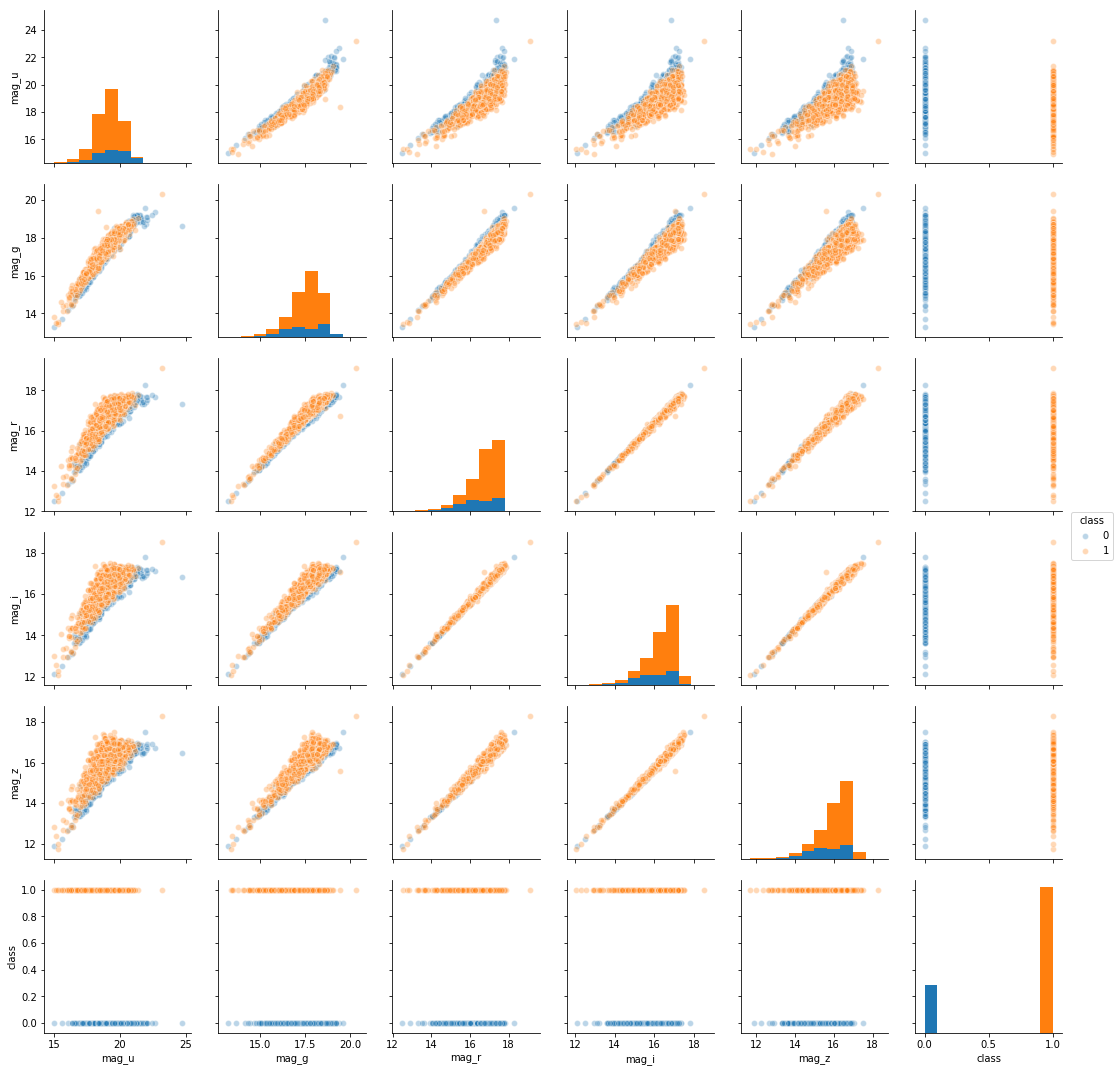

In [81]:
# Magnitudes scatterplot
magnitudes = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z']
selected_columns = magnitudes + ['class']
sb.pairplot(df[selected_columns], hue='class', plot_kws={'alpha': 0.3})

From the magnitude scatterplot matrix, we see a potential outlier: the `mag_u` value of an `elliptical` galaxy falls outside its normal range (a value of ~24) and there seems to be an outlier for the spirals as well with values >18 for all(?) magnitudes.

In [82]:
# Inspect possible outliers
df[(df.loc[:, df.columns.str.startswith('mag')]>18).all(axis=1) | (df['mag_u'] > 24)]

,id,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,class
1648,587725076068630000,0.197396,24.691055,18.609446,17.322205,16.840137,16.470734,4.020255,0.566911,1.896705,0.587880,11.366684,0
2503,587722982809534000,0.144688,23.165754,20.303535,19.109604,18.516237,18.302301,0.318959,0.999208,0.388597,0.999293,11.022225,1


There is nothing obvious that leads us to believe the records are erroneous. Let's keep them in our dataset.

Next we have a look at the distribution of the other measurements in our dataset:

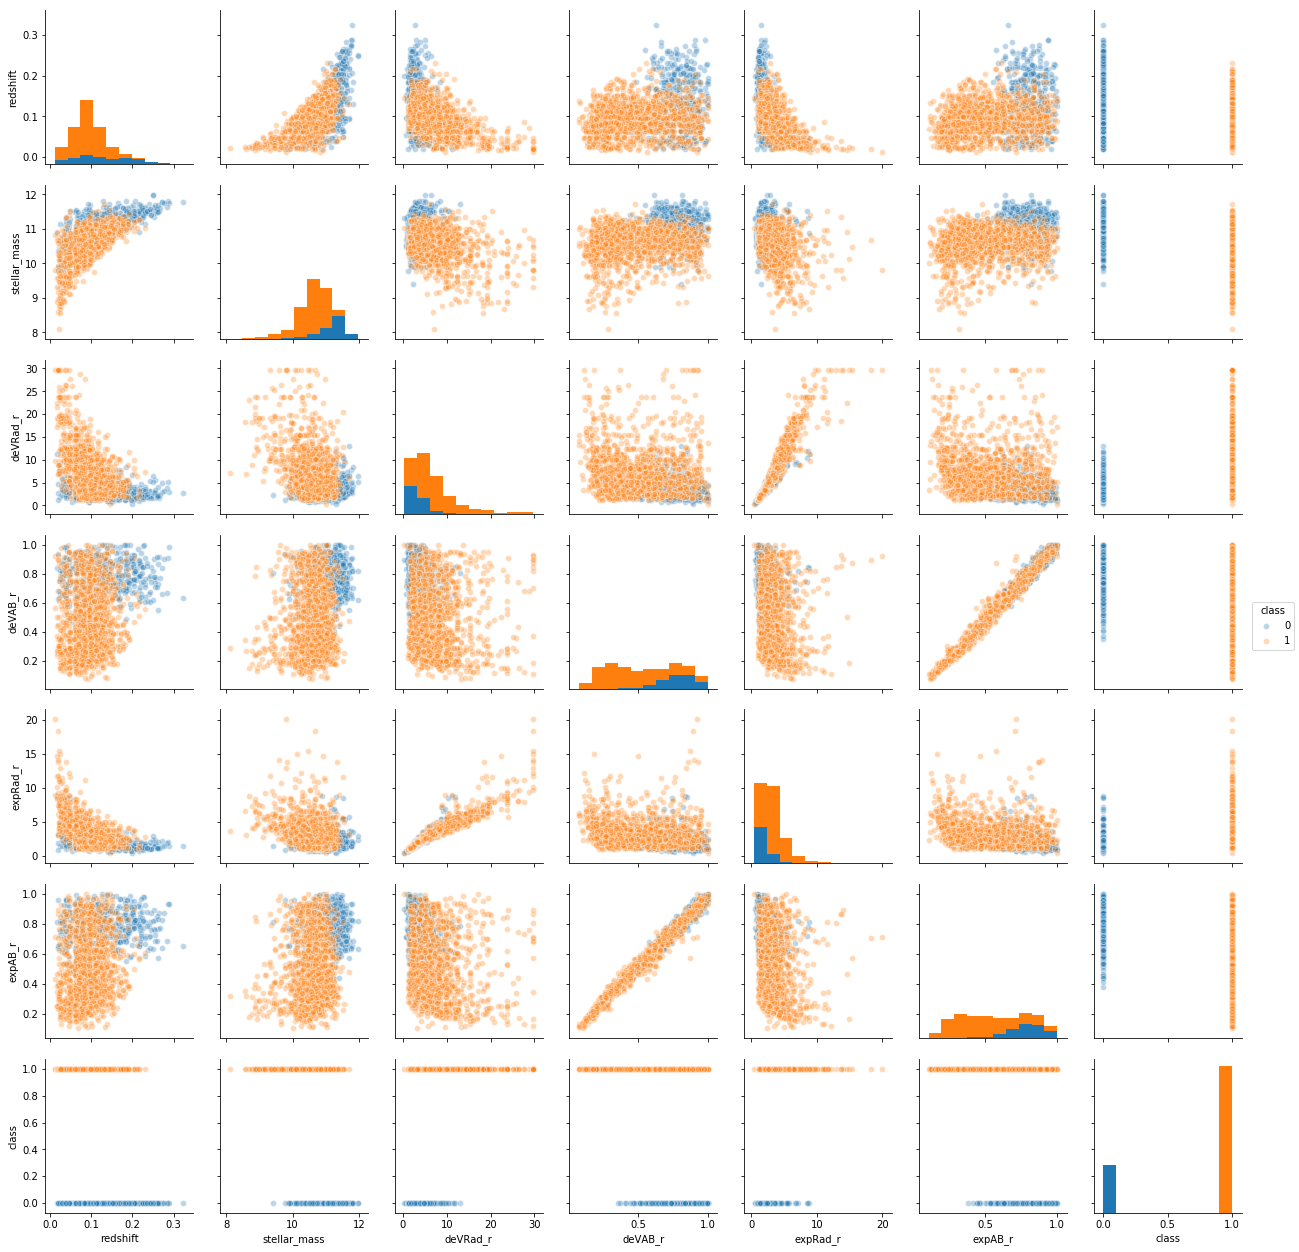

In [83]:
# Measurements scatterplot
measurements = ['redshift', 'stellar_mass', 'deVRad_r', 'deVAB_r', 'expRad_r', 'expAB_r']
selected_columns = measurements + ['class']
sb.pairplot(df[selected_columns], hue='class', plot_kws={'alpha': 0.3})

From the scatterplot matrix, we see potential outliers: 

- the `stellar_mass` value of a `spiral` galaxy falls outside its normal range (a value of ~8).
- two spiral galaxies with `expRad_r` ≥ 17

Let's inspect the outlier records to determine whether if we should keep them in our training dataset.

In [84]:
# Inspect possible outliers
df[(df['stellar_mass'] < 8.1) | (df['expRad_r'] >= 17)]

,id,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass,class
182,587728949585641000,0.012020,14.966660,13.821495,13.269974,12.974790,12.817201,29.669777,0.923756,20.043400,0.710810,9.796802,1
4055,588848900983357000,0.019539,15.099066,13.491796,12.831215,12.539690,12.357201,29.664835,0.896817,18.310259,0.706753,10.693024,1
4058,588848899373203000,0.022227,18.130810,17.433451,17.335270,17.346979,17.249697,7.074944,0.287028,3.689104,0.319042,8.096545,1


There is nothing obvious that leads us to believe the records are erroneous. Let's keep them in our dataset.

Fixing outliers can be difficult. It's often unclear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly. For that reason, we should be careful when working with outliers. If we decide to exclude any data, we should document what data was excluded and provide reasons for excluding that data. i.e. The data didn't fit my hypothesis will not stand peer review.


## Writing Out Data to CSV

After all this hard work, we don't want to repeat the data cleaning process every time we work with this dataset. Let's save the cleaned dataset as a separate file and work directly with that data file from now on.

We can use the `to_csv` command to do export a DataFrame in CSV format. 
Note that by default the data will be saved into the current working directory. 
We can save it to a different folder by adding the foldername and a slash before the file name,
either using relative or absolute path names.

```python
# Write DataFrame to CSV 
df.to_csv('galaxies-clean.csv')
```

Check out your working directory to make sure the CSV wrote out properly, and
that you can open it! If you want, try to bring it back into python to make sure
it imports properly.

```python	
# for kicks read our output back into python and make sure all looks good
new_output = pd.read_csv('galaxies-clean.csv', keep_default_na=False, na_values=["NA"])
```

In [85]:
# Save the clean dataset to a file (try saving it into the correct folder for tomorrows/DAY3 lesson)
df.to_csv('galaxies-clean.csv', index=False)

Some more useful info to get you started and keep you going with notebooks and pandas:

**Notebook tips and tricks**
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

**Pandas cheat sheet**
https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/


**Join the ADACS facebook group to stay up-to-date with upcoming training!**

# Merging DataFrames


In many "real world" situations, the data that we want to use come in multiple
files. We often need to combine these files into a single DataFrame to analyze
the data. The pandas package provides [various methods for combining
DataFrames](http://pandas.pydata.org/pandas-docs/stable/merging.html) including
`merge` and `concat`.

To work through the examples below, we first need to load the galaxy zoo and
SDSS files into pandas DataFrames. In iPython:

``` python
import pandas as pd
gal_df = pd.read_csv('GalaxyZooSub.csv',
                         keep_default_na=False, na_values=["NA"])
sdss = pd.read_csv('SDSS_blue_centre_query.csv',
                         keep_default_na=False, na_values=[""])
gal_df.dtypes
sdss.dtypes
```

In [ ]:
import pandas as pd
gal_df = pd.read_csv('GalaxyZooSub.csv',
                         keep_default_na=False, na_values=["NA"])
sdss = pd.read_csv('SDSS_blue_centre_query.csv',
                         keep_default_na=False, na_values=[""])


In [ ]:
gal_df.dtypes

In [ ]:
sdss.dtypes

Take note that the `read_csv` method we used can take some additional options which
we didn't use previously. Many functions in python have a set of options that
can be set by the user if needed. In this case, we have told Pandas to assign
empty values in our CSV to NaN `keep_default_na=False, na_values=[""]`.
[http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html](More
about all of the read_csv options here.)


## Concatinating

We can use the `concat` function in Pandas to append either columns or rows from
one DataFrame to another.  Let's grab two subsets of our data to see how this
works.


In [ ]:
# read in first 10 lines of gal_df table
gal_sub=gal_df.head(10)
gal_sub

In [ ]:
# grab the last 10 rows (minus the last one)
gal_last10=gal_df[-11:-1]
gal_last10

In [ ]:
#reset the index values to the second dataframe appends properly
# drop=True option avoids adding new index column with old index values
gal_last10 = gal_last10.reset_index(drop=True)
gal_last10

When we concatenate DataFrames, we need to specify the axis. `axis=0` tells
Pandas to stack the second DataFrame under the first one. It will automatically
detect whether the column names are the same and will stack accordingly.
`axis=1` will stack the columns in the second DataFrame to the RIGHT of the
first DataFrame. To stack the data vertically, we need to make sure we have the
same columns and associated column format in both datasets. When we stack
horizonally, we want to make sure what we are doing makes sense (ie the data are
related in some way).


In [ ]:
# stack the DataFrames on top of each other
vertical_stack = pd.concat([gal_sub,gal_last10], axis=0)
vertical_stack

In [ ]:
# place the DataFrames side by side
horizontal_stack = pd.concat([gal_sub,gal_last10], axis=1)
horizontal_stack

### Challenge 
**Row Index Values and Concat**

Have a look at the `vertical_stack` dataframe? Notice anything unusual?
The row indexes for the two data frames `survey_sub` and `survey_sub_last10`
have been repeated. We can reindex the new dataframe using the `reset_index()` method.

# Joining DataFrames

When we concatenated our DataFrames we simply added them to each other -
stacking them either vertically or side by side. Another way to combine
DataFrames is to use columns in each dataset that contain common values (a
common unique id). Combining DataFrames using a common field is called
"joining". The columns containing the common values are called "join key(s)".
Joining DataFrames in this way is often useful when one DataFrame is a "lookup
table" containing additional data that we want to include in the other. 

For example, the `SDSS_blue_centre_query.csv` file that we've been loaded is a query from the SDSS DR7 database for 1000 galaxies with blue centres (things we would expect to be Spirals). 
This table contains the ID, postition, redshift and r-band magnitude as well as size measurements.

## Joining Two DataFrames 

### Identifying join keys

To identify appropriate join keys we first need to know which field(s) are
shared between the files (DataFrames). We might inspect both DataFrames to
identify these columns. If we are lucky, both DataFrames will have columns with
the same name that also contain the same data. If we are less lucky, we need to
identify a (differently-named) column in each DataFrame that contains the same
information.

Check the column names for gal_df and sdss

In [ ]:
print(gal_df.columns.values)
print(sdss.columns.values)


In our example, the join key is the column containing the object
identifier. We could also use 'ra' and 'dec', however, they are not presented in the same units thus joining on id will be esier.

There are [different types of joins](http://blog.codinghorror.com/a-visual-explanation-of-sql-joins/), so we
also need to decide which type of join makes sense for our analysis.

## Inner joins

The most common type of join is called an _inner join_. An inner join combines
two DataFrames based on a join key and returns a new DataFrame that contains
**only** those rows that have matching values in *both* of the original
DataFrames. 

Inner joins yield a DataFrame that contains only rows where the value being
joins exists in BOTH tables. An example of an inner join, adapted from [this
page](http://blog.codinghorror.com/a-visual-explanation-of-sql-joins/) is below:

![Inner join -- courtesy of codinghorror.com](http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b012877702708970c-pi.png)

The pandas function for performing joins is called `merge` and an inner join is
the default option:  

In [ ]:
merged_inner = pd.merge(left=gal_df,right=sdss, left_on='id', right_on='objID')
# if both column names were 'id', we could skip the `left_on`
# and `right_on` arguments and still get the same result

In [ ]:
# what's the size of the output data?
merged_inner.shape

In [ ]:
merged_inner

The result of an inner join of `gal_df` and `sdss` is a new DataFrame
that contains the combined set of columns from `gal_df` and `sdss`. It
*only* contains rows that have an ID that is the same in
both the `gal_df` and `sdss` DataFrames. 

In other words, if a row in
`gal_df` has a value of `id` that does *not* appear in the `objID`
column of `sdss`, it will not be included in the DataFrame returned by an
inner join.  Similarly, if a row in `sdss` has a value of `objID`
that does *not* appear in the `id` column of `gal_df`, that row will not
be included in the DataFrame returned by an inner join.

The two DataFrames that we want to join are passed to the `merge` function using
the `left` and `right` argument. The `left_on='id'` argument tells `merge`
to use the `id` column as the join key from `gal_df` (the `left`
DataFrame). Similarly , the `right_on='objID'` argument tells `merge` to
use the `objID` column as the join key from `sdss` (the `right`
DataFrame). For inner joins, the order of the `left` and `right` arguments does
not matter.

The result `merged_inner` DataFrame contains all of the columns from `survey_sub` as well as all the columns from `sdss`.

Notice that `merged_inner` has way fewer rows than `gal_df`. This is an
indication that there were rows in `gal_df` with value(s) for `id` that
do not exist as value(s) for `objID` in `sdss`.
 
## Left joins

What if we want to add information from `sdss` to `gal_df` without
losing any of the information from `gal_df`? In this case, we use a different
type of join called a "left outer join", or a "left join".

Like an inner join, a left join uses join keys to combine two DataFrames. Unlike
an inner join, a left join will return *all* of the rows from the `left`
DataFrame, even those rows whose join key(s) do not have values in the `right`
DataFrame.  Rows in the `left` DataFrame that are missing values for the join
key(s) in the `right` DataFrame will simply have null (i.e., NaN or None) values
for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the `right` DataFrame that do not
have values for the join key(s) in the `left` DataFrame.

![Left Join](http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b01287770273e970c-pi.png)

A left join is performed in pandas by calling the same `merge` function used for
inner join, but using the `how='left'` argument:

In [ ]:
merged_left = pd.merge(left=gal_df,right=sdss, left_on='id', right_on='objID', how='left')

merged_left

The result DataFrame from a left join (`merged_left`) looks very much like the
result DataFrame from an inner join (`merged_inner`) in terms of the columns it
contains. However, unlike `merged_inner`, `merged_left` contains the **same
number of rows** as the original `gal_df` DataFrame. When we inspect
`merged_left`, we find there are rows where the information that should have
come from `sdss` (e.g., `z`, `r`, and `expRad_r`) is
missing (they contain NaN values):

In [ ]:
len(merged_left[ pd.isnull(merged_left.z) ])


These rows are the ones where the value of `id` from `sdss` does not occur in `gal_df`.


## Other join types

The pandas `merge` function supports two other join types:

* Right (outer) join: Invoked by passing `how='right'` as an argument. Similar
  to a left join, except *all* rows from the `right` DataFrame are kept, while
  rows from the `left` DataFrame without matching join key(s) values are
  discarded.
* Full (outer) join: Invoked by passing `how='outer'` as an argument. This join
  type returns the all pairwise combinations of rows from both DataFrames; i.e.,
  the result DataFrame will `NaN` where data is missing in one of the dataframes. This join type is
  very rarely used.
